In [1]:
from parkour_env import parkour_env

/opt/miniconda3/envs/minerl-0.4.4/lib/python3.10/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [2]:
env = parkour_env(resolution=(256,256), map="bridge_hybrid", debug=False, fast=True)

/opt/miniconda3/envs/minerl-0.4.4/lib/python3.10/site-packages/minerl/herobraine/hero/spaces.py:484: UserWarning: The Text MineRLSpace class is not fully implemented. This may cause problems when sampling an action of this type (even when getting a noop).
  warnings.warn("The Text MineRLSpace class is not fully implemented. This may cause problems when sampling an action of this type (even when getting a noop).")


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from itertools import count

In [3]:
obs = env.reset()

/opt/miniconda3/envs/minerl-0.4.4/lib/python3.10/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
/opt/miniconda3/envs/minerl-0.4.4/lib/python3.10/runpy.py:126: RuntimeWarning: 'minerl.utils.process_watcher' found in sys.modules after import of package 'minerl.utils', but prior to execution of 'minerl.utils.process_watcher'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


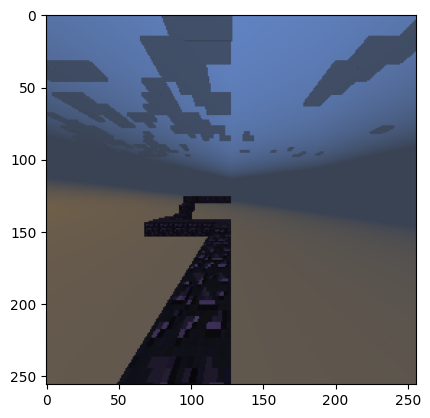

In [6]:
plt.imshow( obs['pov'] )
plt.show()

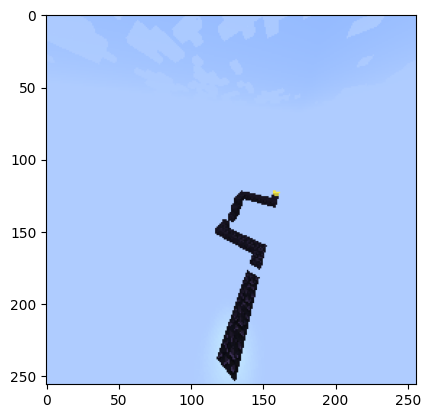

In [25]:
obs, _, _, _ = env.teleport((0, 9, 0), (-30, 30))
plt.imshow( obs['pov'] )
plt.show()

In [26]:
env.teleport((0, 2, 0), (0, 0))

({'pov': array([[[147, 185, 255],
          [147, 185, 255],
          [147, 185, 255],
          ...,
          [145, 184, 255],
          [145, 184, 255],
          [145, 184, 255]],
  
         [[147, 185, 255],
          [147, 185, 255],
          [147, 185, 255],
          ...,
          [145, 184, 255],
          [145, 184, 255],
          [145, 184, 255]],
  
         [[147, 185, 255],
          [147, 185, 255],
          [147, 185, 255],
          ...,
          [145, 184, 255],
          [145, 184, 255],
          [145, 184, 255]],
  
         ...,
  
         [[175, 204, 255],
          [175, 204, 255],
          [175, 204, 255],
          ...,
          [175, 204, 255],
          [175, 204, 255],
          [175, 204, 255]],
  
         [[175, 204, 255],
          [175, 204, 255],
          [175, 204, 255],
          ...,
          [175, 204, 255],
          [175, 204, 255],
          [175, 204, 255]],
  
         [[175, 204, 255],
          [175, 204, 255],
          [175, 2

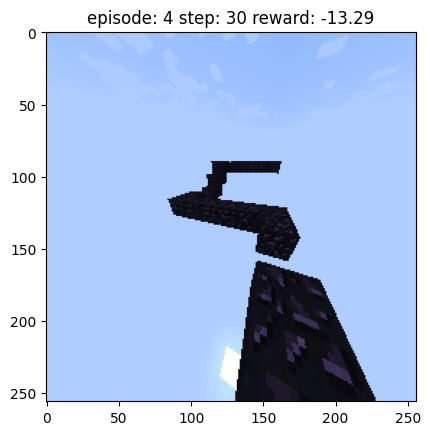

In [27]:
for episode in range(5):
    obs = env.reset()

    done = False
    reward = 0
    for t in count():
        env.render()
        
        if t % 10 == 0:
            clear_output(wait=True)
            plt.imshow( obs['pov'] )
            plt.title(f'episode: {episode} step: {t} reward: {reward:.2f}')
            plt.show()

        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)

        if done:
            break